In [1]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [28]:

df = pd.read_csv("../data/processed/cleaned_properties.csv")

## Define target model

In [30]:
target = "price"

num_features = ["size_sqm", "bedrooms", "bathrooms"]      # numeric
cat_features = ["listing_type", "purpose", "location", "source"]  # categoricals
text_like    = ["title", "link"]  # exclude for baseline; add later via NLP or URL features

features = num_features + cat_features  # final feature list

X = df[features].copy()
y = df[target].copy()


In [31]:
X[num_features] = X[num_features].fillna(X[num_features].median())
X[cat_features] = X[cat_features].fillna("missing")


In [32]:
X = pd.get_dummies(X, columns=cat_features, drop_first=True)


## train

In [33]:

#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## model

In [34]:

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [36]:

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [37]:

print(f" R² Score: {r2:.2f}")
print(f" MAE: {mae:.2f} OMR")


 R² Score: 0.32
 MAE: 126668.58 OMR


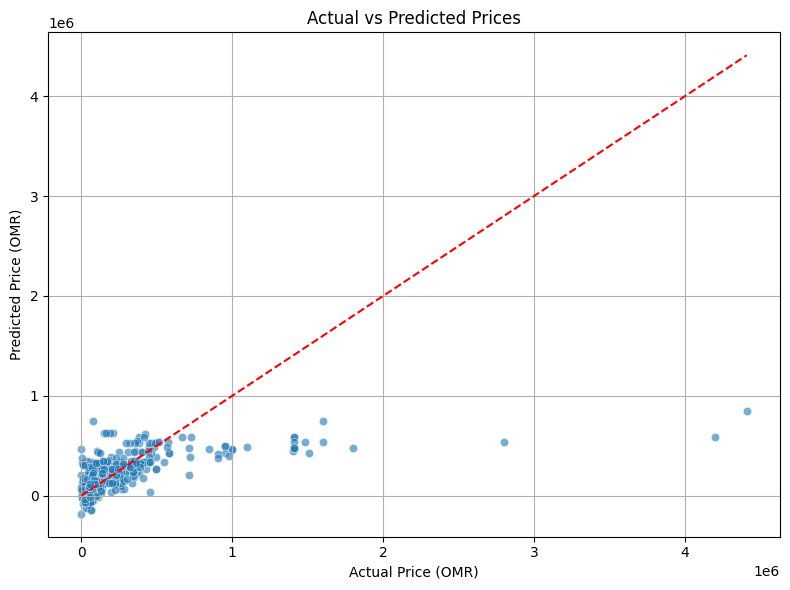

In [38]:

# 📉 Plot actual vs predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Price (OMR)")
plt.ylabel("Predicted Price (OMR)")
plt.title("Actual vs Predicted Prices")
plt.grid(True)
plt.tight_layout()
plt.show()


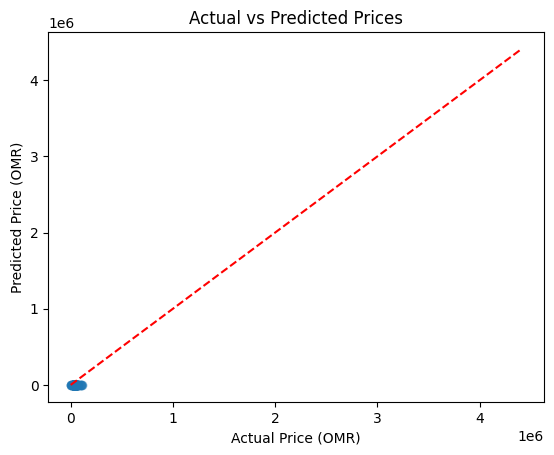

In [43]:

y_true = np.expm1(y_test)
y_pred = np.expm1(y_pred)

plt.scatter(y_true, y_pred, alpha=0.5)
plt.xlabel("Actual Price (OMR)")
plt.ylabel("Predicted Price (OMR)")
plt.title("Actual vs Predicted Prices")
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
plt.show()


In [42]:
from sklearn.ensemble import RandomForestRegressor

X = df[num_features + cat_features].copy()
y = np.log1p(df["price"])

X[num_features] = X[num_features].fillna(X[num_features].median())
X[cat_features] = X[cat_features].fillna("missing")
X = pd.get_dummies(X, columns=cat_features, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=400, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

pred = np.expm1(rf.predict(X_test))
true = np.expm1(y_test)
print("MAE:", mean_absolute_error(true, pred))
print("R² :", r2_score(true, pred))


MAE: 51049.9881857321
R² : 0.8339849650138247
